In [1]:
from evals_pkg.evals.persistence import load_run_results, RunResults, print_run_results
from evals_pkg.evals import generate_data
import numpy as np
import matplotlib.pyplot as plt

In [52]:
N_IND = 3
N_DEP = 5
total_cells = N_IND + N_DEP
N_TIMEPOINTS = 10

data = generate_data.generate_data(n_blocks=1,
    n_independent_per_block= N_IND,
    n_dependent_per_block= N_DEP,
    n_timepoints = N_TIMEPOINTS,
    noise = 0.0000001,
    length_scale = 10,
    weights_length_scale = 2,
    seed= 0,
    p_active = 0.1,
    flip_prob_active = 0.1,
    flip_prob_inactive = 0.1,
    threshold_for_active = 0.1)

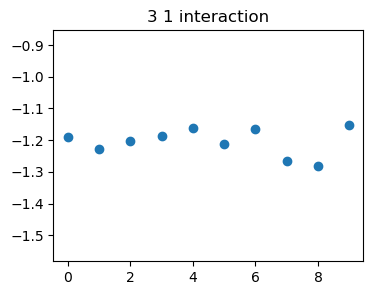

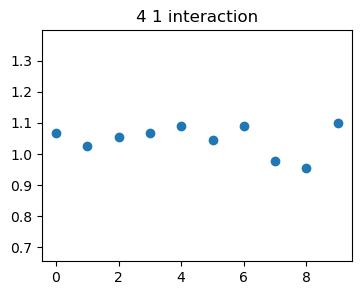

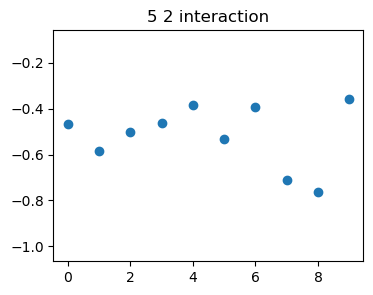

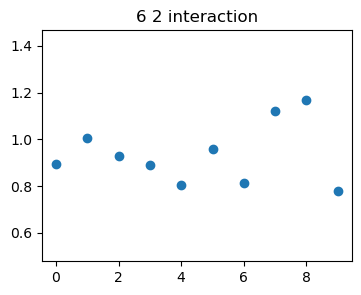

In [53]:
for i in range(total_cells-1):
    for j in range(total_cells-1):
        # print(i,j)
        if i == j: continue
        y = data.weights[:,i,j]
        if np.max(np.abs(y)) < 0.05: continue
        plt.figure(figsize = (4,3))
        plt.scatter(np.arange(0,N_TIMEPOINTS),y)
        plt.title(f'{i} {j} interaction')
        plt.ylim((np.min(y)-0.3,np.max(y)+0.3))
        plt.show()

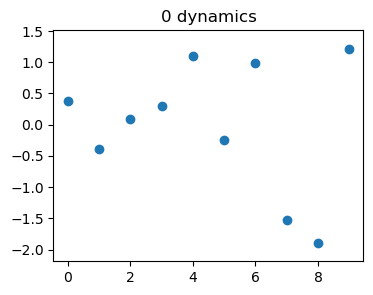

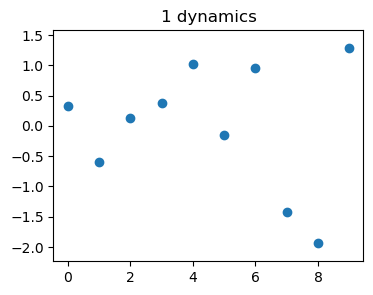

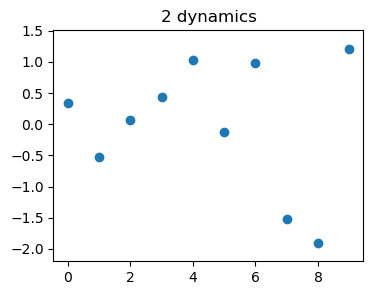

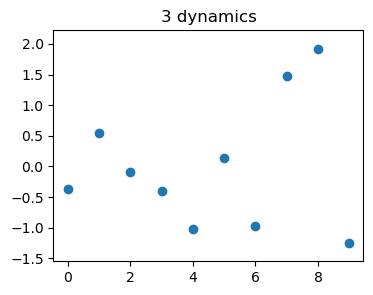

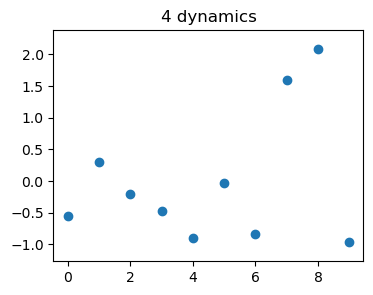

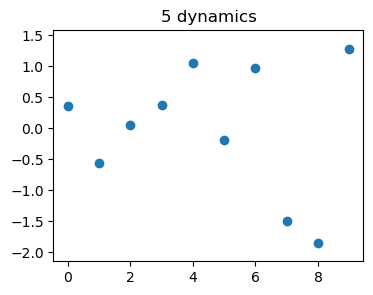

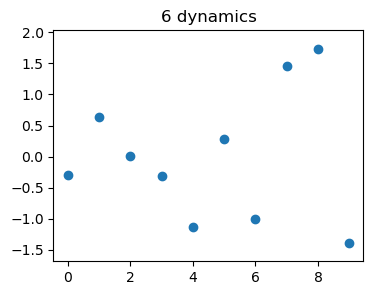

In [54]:
for i in range(total_cells-1):
    y = data.standardized_observations[:,i]
    if np.max(np.abs(y)) < 0.05: continue
    plt.figure(figsize = (4,3))
    plt.scatter(np.arange(0,N_TIMEPOINTS),y)
    plt.title(f'{i} dynamics')
    plt.ylim((np.min(y)-0.3,np.max(y)+0.3))
    plt.show()

In [ ]:
## changing function  generate_data.create_true_interactions_from_dependent_computations()
# weights = data.weights
# threshold= 0.1
# n_timepoints, total_cells, _ = weights.shape
# is_active_matrix = np.abs(weights) > threshold
# is_active_matrix = is_active_matrix.astype(int)
# adjacency_matrix = np.maximum(is_active_matrix, is_active_matrix.transpose(0, 2, 1))
# # Ensure symmetry

# for t in range(n_timepoints):
#     # Make sure diagonal is 1 for computation
#     # adjacency_matrix[t] = np.maximum(adjacency_marix[t], np.eye(total_cells))
#     # reachability_matrix[t] = compute_reachability_matrix(adjacency_matrix[t])
#     # But also ensure it is 0 for the final result
#     np.fill_diagonal(is_active_matrix[t,:,:],0)

# true_interactions = is_active_matrix.astype(int)